In [ ]:
from pathlib import Path
from textwrap import fill

import numpy as np
import pandas as pd
import requests
import seaborn as sns
import tiktoken
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

In [ ]:
pip install openai tiktoken

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""  # paste your key here


In [ ]:
from openai import OpenAI
client = OpenAI()

resp = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[{"role": "user", "content": "Say 'API connection successful'"}],
    max_tokens=10
)

print(resp.choices[0].message.content)

API connection successful


In [ ]:
from openai import OpenAI
client = OpenAI()   # connects to OpenAI’s servers using your API key
MODEL = "gpt-4.1-nano"    # you can also try "gpt-4o" or "gpt-3.5-turbo"
DATA_DIR = Path.cwd().parent / "data"

In [ ]:
df = pd.read_csv(DATA_DIR / "/content/train.csv", index_col=0)

In [ ]:
df

,text,summary
paper_id,,
0,## FROM SOVEREIGNTY TO EXTRATERRITORIAL CONSCI...,"In this article, Victor Fan argues that analys..."
1,## 1. Introduction\n\n\nAn Electronic Health R...,Problem definition: Physicians spend more than...
2,## Introduction\n\n\nTranslation plays an i...,Literary translation is one of the most challe...
3,## 1 Problem Setup\n\n\nRecent political scien...,There is a long-running debate on evaluating f...
4,## INTRODUCTION\n\n\nThis article investigat...,"Recently, ‘bimajyo’ (美魔女) came into focus in J..."
...,...,...
995,## Methods\n\n\n\n## Sample\n\n\nOur data come...,Demand for democratic accountability in polici...
996,## Introduction\n\n\nCanada is a high-income c...,Canada’s employment standards laws and mandato...
997,## Introduction\n\n\nCultural studies has ofte...,Cultural studies has often favoured a Foucauld...


In [ ]:
print(f"Document length: {len(df.loc[0, 'text']):,} characters")
print("Document:")
print(fill(df.loc[0, "text"], replace_whitespace=False)[:1000])

Document length: 33,416 characters
Document:
## FROM SOVEREIGNTY TO EXTRATERRITORIAL CONSCIOUSNESS


Since 1997,
the concept of extraterritoriality has been configured in the
political tension between Hong Kong and Beijing. From the perspective
of the Central Government, it is fundamental for the people of China
to shijian zhuquan instantiate its sovereignty over Hong Kong. But
while most Hong / Kong residents insist on interpreting this concept
in terms of the Euro-American notion of selfdetermination  (zizhu /
making decisions  for  oneself),  the  Beijing  government  believes
that  the Hong Kong legislature must make decisions in conformation to
the larger will of the people, which the Party represents, a concept
taken from the writings of Lenin and Stalin (Gao 2010: 26-30). This
tension is crystalised in the long debate about Article 23 of the Hong
Kong Basic Law, which requires  the  SAR  to  'enact  laws  on  its
own  to  prohibit  any  act  of  treason,  secession,  sedition,
s

In [ ]:
print(fill(df.loc[0, "summary"]))

In this article, Victor Fan argues that analysing contemporary Hong
Kong cinema requires active rewriting of established postcolonial
theories by taking into account the specific mode of colonisation of
Hong Kong: extraterritoriality. This concept has been responsible for
the construction of the cultural plurality, linguistic ambiguity, and
political liminality of Hong Kong and its cinematographic experience,
as well as the incongruence between the community’s political
consciousness after 1997 and the larger national imagination
promulgated by the Beijing government. The term ‘extraterritoriality’
was translated into Chinese after 1895 via Japanese as zhiwai faquan
the right to exercise one’s law outside a nation state’s sovereign
terrain, and colonialism in China between 1844 and 1949 was largely
characterized by a continuous reformulation and systematisation of
this concept. It in fact still informs the way former colonised
regions in China are administered today, and the political 

In [ ]:
df["text_len"] = df.text.str.len()
df["summary_len"] = df.summary.str.len()
df["text_len_log"] = np.log10(df.text_len)
df["summary_len_log"] = np.log10(df.summary_len)

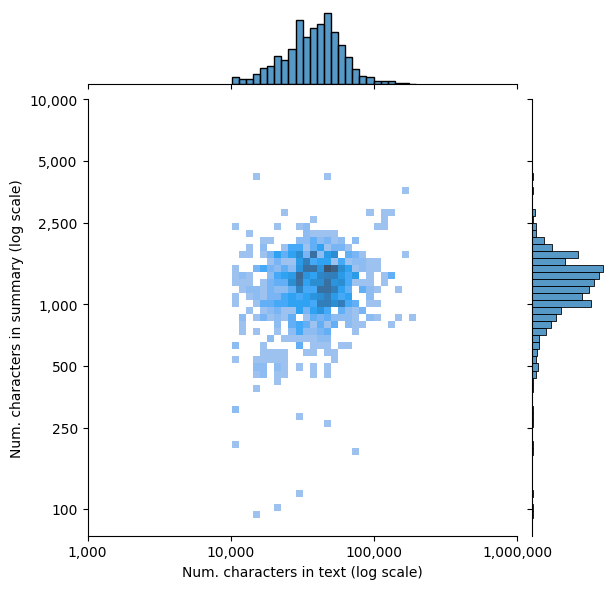

In [ ]:
g = sns.jointplot(df, x="text_len_log", y="summary_len_log", kind="hist")
xticks = [3, 4, 5, 6]
yticks = [2, np.log10(250), np.log10(500), 3, np.log10(2_500), np.log10(5_000), 4]
g.ax_marg_x.set_xticks(xticks, [f"{10**tick:,.0f}" for tick in xticks])
g.ax_marg_y.set_yticks(yticks, [f"{10**tick:,.0f}" for tick in yticks])
g.set_axis_labels(
    "Num. characters in text (log scale)", "Num. characters in summary (log scale)"
)

In [ ]:
df.describe()

,text_len,summary_len,text_len_log,summary_len_log
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,42050.269000,1275.241000,4.574534,3.079240
std,21412.146068,426.262199,0.207977,0.162033
min,10145.000000,90.000000,4.006252,1.954243
25%,28381.500000,1008.500000,4.453035,3.003676
50%,38962.000000,1258.500000,4.590641,3.099853
75%,51263.250000,1501.250000,4.709806,3.176453
max,196911.000000,4359.000000,5.294270,3.639387


In [ ]:
df.head()

,text,summary,text_len,summary_len,text_len_log,summary_len_log
paper_id,,,,,,
0,## FROM SOVEREIGNTY TO EXTRATERRITORIAL CONSCI...,"In this article, Victor Fan argues that analys...",33416,1302,4.523954,3.114611
1,## 1. Introduction\n\n\nAn Electronic Health R...,Problem definition: Physicians spend more than...,80639,1661,4.906545,3.220370
2,## Introduction\n\n\nTranslation plays an i...,Literary translation is one of the most challe...,24014,1218,4.380465,3.085647
3,## 1 Problem Setup\n\n\nRecent political scien...,There is a long-running debate on evaluating f...,16296,463,4.212081,2.665581
4,## INTRODUCTION\n\n\nThis article investigat...,"Recently, ‘bimajyo’ (美魔女) came into focus in J...",43641,1100,4.639895,3.041393


In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=0)
f"Train shape: {train.shape}; Test shape: {test.shape}"

'Train shape: (700, 6); Test shape: (300, 6)'

In [ ]:
train, validation = train_test_split(train, test_size=0.30, random_state=0)
f"Train shape: {train.shape}; Validation shape: {validation.shape}; Test shape: {test.shape}"

'Train shape: (490, 6); Validation shape: (210, 6); Test shape: (300, 6)'

In [ ]:
def doc_and_summary_from_row(doc_row: pd.Series):
    """Pull out the document and summary"""
    return doc_row["text"], doc_row["summary"]


def show_doc_and_summary(doc: str, summary: str, max_len_to_print: int = 500) -> str:
    """Show a little bit of a doc and its summary"""

    return (
        f"Document ({max_len_to_print:,} of {len(doc):,} characters):\n"
        f"{fill(doc[:max_len_to_print], replace_whitespace=False)}...\n\n"
        f"Summary ({len(summary):,} characters):\n"
        f"{fill(summary)}"
    )


doc_row = train.loc[533]
doc, summary = doc_and_summary_from_row(doc_row)

print(show_doc_and_summary(doc, summary))

Document (500 of 135,755 characters):
## 1.1 Policy context


Some 25 per cent of Australians live outside
one of the nation's capitals, resulting in a substantial
nonmetropolitan population in absolute terms, but a much smaller
population relative to the total number resident in the largest
metropolitan centres. Policy for rural and regional housing across
Australia is made complex by federation: the Australian Government has
relatively few direct powers with respect to housing, but remains an
important source of financial support...

Summary (1,405 characters):
This AHURI research examined housing trends and the processes of
delivering affordable housing supply in rural and regional Australia.
These rural and regional housing markets have faced substantial
challenges for more than three decades, including poor housing
affordability; under-developed supply chains; the shortage of skilled
and unskilled labour force; increasing demand for housing in some
localities, while other centres 

In [ ]:
prompt_template = 'Here is a terrific one-sentence summary of "{doc}": '
prompt = prompt_template.format(doc=doc) #limit to 4000 characters since api cant take on the whole document
#prompt = prompt_template.format(doc=doc[:110000]) #limit to 4000 characters since api cant take on the whole document


def show_prompt(prompt: str, start_chars: int = 60, end_chars: int = 30) -> str:
    """Nicely format a prompt"""
    return f"Our prompt ({len(prompt):,} characters):\n{prompt[:start_chars]} ... {prompt[-end_chars:]}"


print(show_prompt(prompt))

Our prompt (135,802 characters):
Here is a terrific one-sentence summary of "## 1.1 Policy co ... e off housing nationwide.

": 


In [ ]:
LLM_SERVER = "https://api.openai.com"
MODEL = "gpt-4.1-nano"

def get_llm_completion(
    prompt: str, max_tokens: int | None = None, top_k: int | None = None
) -> str:
    headers = {
        "Authorization": f"Bearer {os.getenv('OPENAI_API_KEY')}",
        "Content-Type": "application/json"
    }
    data = {
        "model": MODEL,
        "messages": [{"role": "user", "content": prompt}],
        "max_tokens": max_tokens or 200,
    }
    resp = requests.post(f"{LLM_SERVER}/v1/chat/completions", headers=headers, json=data)
    try:
        return resp.json()["choices"][0]["message"]["content"].strip()
    except KeyError:
        print("API response was not successful. Full response:")
        print(resp.json())
        raise

In [ ]:
completion = get_llm_completion(prompt)
print(prompt_template + "\n\n" + fill(completion, replace_whitespace=False)[:1000])

You are a careful scientific writer.
Write a single concise paragraph (3-6 sentences) that summarizes the core claims, methods, and findings.
Do not include references, citations, or headings. Only use information from the text:

{doc}

The Australian federation's complex division of housing
responsibilities among federal, state, territory, and local
governments—combined with regional disparities, supply chain
challenges, and disruptive events like COVID-19—necessitates targeted,
place-based policy interventions and coordinated strategies, such as
expanding investment through programs like the Housing Australia
Future Fund, fostering supply chain resilience, and leveraging
international best practices, to effectively address rural and
regional housing shortages, affordability issues, and market
stagnation.


In [ ]:
def count_tokens(text: str) -> int:
    """Count the number of tokens in a string"""
    enc = tiktoken.encoding_for_model("gpt-4o")
    return len(enc.encode(text))

In [ ]:
print(f"Our prompt is {count_tokens(prompt):,} tokens.")

Our prompt is 25,853 tokens.


In [ ]:
print(show_prompt(prompt))

Our prompt (135,802 characters):
Here is a terrific one-sentence summary of "## 1.1 Policy co ... e off housing nationwide.

": 


In [ ]:
#shorter_prompt = prompt_template.format(doc=doc[:7_500])
longer_prompt = prompt_template.format(doc=doc)
print(f"Our longer prompt is {count_tokens(longer_prompt):,} tokens long.")
print(show_prompt(longer_prompt))

Our longer prompt is 25,887 tokens long.
Our prompt (135,985 characters):
You are a careful scientific writer.
Write a single concise  ... sure off housing nationwide.




In [ ]:
completion = get_llm_completion(longer_prompt)
print(fill(completion, replace_whitespace=False)[:1000])

This comprehensive study examines the multifaceted challenges and
policy responses related to rural and regional housing markets in
Australia, employing qualitative case studies, stakeholder surveys,
quantitative clustering, and policy analysis. It finds that regional
housing markets are highly differentiated, with disruption driven by
long-term structural issues such as labor shortages, rising
construction costs, land supply constraints, and demographic trends,
compounded by short-term shocks like COVID-19. Despite recent policy
innovations and targeted programs, significant gaps remain in social
housing provision, and the most critical barrier to increasing supply
is labor scarcity rather than land or regulatory obstacles. The
research emphasizes that effective solutions require a combination of
place-based, demand-driven, and government-led interventions,
including leveraging international best practices, enhancing local
leadership and supply chains, and developing a strategic, cros

In [ ]:
prompt_template

'You are a careful scientific writer.\nWrite a single concise paragraph (3-6 sentences) that summarizes the core claims, methods, and findings.\nDo not include references, citations, or headings. Only use information from the text:\n\n{doc}'

In [ ]:
from openai import OpenAI

from openai import OpenAI
client = OpenAI()   # connects to OpenAI’s servers using your API key
MODEL = "gpt-4.1-nano"    # you can also try "gpt-4-turbo" or "gpt-3.5-turbo"

llm_client = OpenAI()

chat_completion = llm_client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "What's your name, age, and favorite ice cream flavor?",
        }
    ],
    model=MODEL,
    seed=0,
)
print(fill(chat_completion.choices[0].message.content, replace_whitespace=False))

Hello! I don't have a personal name, age, or preferences like favorite
ice cream flavor, but I'm here to help you with anything you need. How
can I assist you today?


In [ ]:
def ask_llm(prompt: str, max_tokens: int = 500):
    """Get a response from an LLM using the OpenAI client"""
    chat_completion = llm_client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model=MODEL,
        seed=0,
        max_tokens=max_tokens,
    )
    return chat_completion.choices[0].message.content, chat_completion

In [ ]:
prompt_template = (
    "You are a senior research editor. Combine partial summaries into a single, faithful abstract. "
    "You never introduce outside information; you reconcile overlaps and remove redundancy.\n\n"
    "Write one cohesive paragraph that functions as a high-level abstract of the full paper. "
    "The result must:\n"
    "- Be coherent English, well under 220 words, and a single paragraph.\n"
    "- Capture only the big picture: problem or context, aim, data or materials, methods or approach, "
    "main findings or claims, and broad implications.\n"
    "- Exclude narrow specifics such as numbers, participant counts, citations, or figure/table references.\n"
    "- Use only information present in the text; do not invent or add anything new.\n"
    "- Resolve overlaps or contradictions; prefer statements repeated or emphasized in the text.\n\n"
    "TEXT:\n{doc}"
)

resp, completion = ask_llm(prompt_template.format(doc=doc))

In [ ]:
print(
    f"Prompt tokens     : {completion.usage.prompt_tokens:,}\nCompletion tokens : {completion.usage.completion_tokens:,}"
)

Prompt tokens     : 25,997
Completion tokens : 276


In [ ]:
print(fill(resp, replace_whitespace=False))

This comprehensive analysis explores the complex landscape of rural
and regional housing markets in Australia, emphasizing the importance
of tailored, place-based policy responses to address long-standing and
emerging disruptions. The study highlights significant spatial and
demographic diversities across regional markets, shaped by economic
shifts, demographic changes, and external shocks such as COVID-19,
which temporarily altered migration and housing demand patterns.
Despite such fluctuations, long-term trends—such as population aging,
workforce migration, and market fragmentation—have largely reasserted
themselves. Data from case studies, stakeholder surveys, and regional
analysis reveal a chronic underinvestment in social and affordable
housing, workforce shortages, and resource limitations, especially in
remote areas. The findings underscore that supply chain disruptions,
particularly the scarcity of skilled labor and rising construction
costs—often accentuated outside metropoli

In [ ]:
def summarize(doc: str, max_doc_chars: int = None) -> str:
    """Summarize (part of) a document"""
    prompt_template = (
    "You are a senior research editor. Combine partial summaries into a single, faithful abstract. "
    "You never introduce outside information; you reconcile overlaps and remove redundancy.\n\n"
    "Write one cohesive paragraph that functions as a high-level abstract of the full paper. "
    "The result must:\n"
    "- Be coherent English, well under 220 words, and a single paragraph.\n"
    "- Capture only the big picture: problem or context, aim, data or materials, methods or approach, "
    "main findings or claims, and broad implications.\n"
    "- Exclude narrow specifics such as numbers, participant counts, citations, or figure/table references.\n"
    "- Use only information present in the text; do not invent or add anything new.\n"
    "- Resolve overlaps or contradictions; prefer statements repeated or emphasized in the text.\n\n"
    "TEXT:\n{doc}"
)
    resp, completion = ask_llm(prompt_template.format(doc=doc))
    return resp


def predict_on_dataset(
    df: pd.DataFrame, max_docs: int | None = None, summarize_fn=summarize
) -> dict[int, str]:
    """Generate a summary for every document in a dataframe"""
    doc_id_to_summary = {}
    max_docs = max_docs or df.shape[0]
    for id, row in tqdm(df.head(max_docs).iterrows(), total=max_docs, smoothing=0):
        doc = row["text"]
        doc_id_to_summary[id] = summarize_fn(doc)
    return doc_id_to_summary

In [ ]:
id_to_summary = predict_on_dataset(train, max_docs=5)
id_to_summary

  0%|          | 0/5 [00:00<?, ?it/s]

{827: 'This paper explores the foundational role of senior research editor Suzuki in the development and promotion of Studio Ghibli\'s films, highlighting how strategic marketing and industry connections transformed the studio into an emblem of high-quality animation. Suzuki’s lifelong immersion in manga, anime, and film, combined with his early editorial work, enabled him to identify and foster key talent such as Miyazaki and Takahata, leading to landmark collaborations that established the studio\'s reputation. His influence extended beyond talent discovery to the pioneering of promotional strategies that emphasized extensive media campaigns, rigorous tie-in partnerships, and sophisticated distribution practices, including careful control over merchandise and advertising content to uphold the studio’s creative integrity. Suzuki’s innovative methods contributed significantly to the commercial success of films like Nausicaä, Kiki’s Delivery Service, and Princess Mononoke, notably throu

In [ ]:
train_id_to_summary = predict_on_dataset(train)
train_preds = train.assign(my_summary=train_id_to_summary)
train_preds

  0%|          | 0/490 [00:00<?, ?it/s]

,text,summary,text_len,summary_len,text_len_log,summary_len_log,my_summary
paper_id,,,,,,,
827,## THE EARLY DAYS\n\n\nSuzuki's link with anim...,While so-called ‘Ghibli films’ attract global ...,35403,1446,4.549040,3.160168,This paper explores the pivotal role of Suzuki...
166,## Introduction\n\n\nThe paper aims to assess ...,The paper aims to assess the quality of the En...,56832,1964,4.754593,3.293141,This study evaluates the quality of the Englis...
170,## Introduction\n\n\nThe medical world is cons...,The medical world is constantly changing. The ...,32191,2364,4.507734,3.373647,This study addresses the pervasive stigma surr...
328,## 1. Introduction\n\n\nResearch and innovatio...,A current issue in mission-oriented research p...,68076,1049,4.832994,3.020775,This paper examines the alignment between curr...
347,## Introduction\n\n\nTeaching writing to ESL s...,The present research is a small-scale case stu...,38230,1518,4.582404,3.181272,This study explores the challenges faced by ES...
...,...,...,...,...,...,...,...
195,"## Introduction\n\n\nSince the 1980s, low-fert...",While extensive literature documents the massi...,41787,1017,4.621041,3.007321,This paper investigates how social age norms f...
948,## Introduction\n\n\nEmpirically analyzing h...,The causal identification of network effects i...,36116,582,4.557700,2.764923,This paper provides a comprehensive overview o...
756,## 3 Data and Methods\n\n\n213\n\n\n## 3.1 Dat...,Interviewer effects are a common challenge in ...,38974,1271,4.590775,3.104146,This study examines the influence of interview...


In [ ]:
val_id_to_summary = predict_on_dataset(validation)
val_preds = validation.assign(my_summary=val_id_to_summary)


  0%|          | 0/210 [00:00<?, ?it/s]

In [ ]:
import abc
import collections
import re

import numpy as np

"""A library for tokenizing text."""
# Pre-compile regexes that are use often
NON_ALPHANUM_PATTERN = r"[^a-z0-9]+"
NON_ALPHANUM_RE = re.compile(NON_ALPHANUM_PATTERN)
SPACES_PATTERN = r"\s+"
SPACES_RE = re.compile(SPACES_PATTERN)
VALID_TOKEN_PATTERN = r"^[a-z0-9]+$"
VALID_TOKEN_RE = re.compile(VALID_TOKEN_PATTERN)


def tokenize(text, stemmer):
    """Tokenize input text into a list of tokens.

    This approach aims to replicate the approach taken by Chin-Yew Lin in
    the original ROUGE implementation.

    Args:
      text: A text blob to tokenize.
      stemmer: An optional stemmer.

    Returns:
      A list of string tokens extracted from input text.
    """

    # Convert everything to lowercase.
    text = text.lower()
    # Replace any non-alpha-numeric characters with spaces.
    text = NON_ALPHANUM_RE.sub(" ", str(text))

    tokens = SPACES_RE.split(text)
    if stemmer:
        # Only stem words more than 3 characters long.
        tokens = [str(stemmer.stem(x)) if len(x) > 3 else x for x in tokens]

    # One final check to drop any empty or invalid tokens.
    tokens = [x for x in tokens if VALID_TOKEN_RE.match(x)]

    return tokens


"""Library containing Tokenizer definitions.

The RougeScorer class can be instantiated with the tokenizers defined here. New
tokenizers can be defined by creating a subclass of the Tokenizer abstract class
and overriding the tokenize() method.
"""


class Tokenizer(abc.ABC):
    """Abstract base class for a tokenizer.

    Subclasses of Tokenizer must implement the tokenize() method.
    """

    @abc.abstractmethod
    def tokenize(self, text):
        raise NotImplementedError("Tokenizer must override tokenize() method")


class DefaultTokenizer(Tokenizer):
    """Default tokenizer which tokenizes on whitespace."""

    def __init__(self, use_stemmer=False):
        """Constructor for DefaultTokenizer.

        Args:
          use_stemmer: boolean indicating whether to use stemming.
          This is set to False by default as we don't use stemming in our implementation
          to avoid the NLTK dependency.
        """
        # Always set _stemmer to None since we don't use the NLTK dependency
        self._stemmer = None

    def tokenize(self, text):
        return tokenize(text, self._stemmer)


"""Computes rouge scores between two text blobs.

This implementation comes from: https://github.com/google-research/google-research/tree/master/rouge

Implementation replicates the functionality in the original ROUGE package. See:

Lin, Chin-Yew. ROUGE: a Package for Automatic Evaluation of Summaries. In
Proceedings of the Workshop on Text Summarization Branches Out (WAS 2004),
Barcelona, Spain, July 25 - 26, 2004.

Default options are equivalent to running:
ROUGE-1.5.5.pl -e data -n 2 -a settings.xml

Or with use_stemmer=True:
ROUGE-1.5.5.pl -m -e data -n 2 -a settings.xml

In these examples settings.xml lists input files and formats.
"""


class Score(collections.namedtuple("Score", ["precision", "recall", "fmeasure"])):
    """Tuple containing precision, recall, and f-measure values."""


class BaseScorer(object, metaclass=abc.ABCMeta):
    """Base class for Scorer objects."""

    @abc.abstractmethod
    def score(self, target, prediction):
        """Calculates score between the target and prediction.

        Args:
          target: Text containing the target (ground truth) text.
          prediction: Text containing the predicted text.

        Returns:
          A dict mapping each score_type (string) to Score object.
        """


class RougeScorer(BaseScorer):
    """Calculate rouges scores between two blobs of text.

    Sample usage:
      scorer = RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
      scores = scorer.score('The quick brown fox jumps over the lazy dog',
                            'The quick brown dog jumps on the log.')
    """

    def __init__(self, rouge_types, tokenizer=None):
        """Initializes a new RougeScorer.

        Valid rouge types that can be computed are:
          rougen (e.g. rouge1, rouge2): n-gram based scoring.
          rougeL: Longest common subsequence based scoring.

        Args:
          rouge_types: A list of rouge types to calculate.
          use_stemmer: Bool indicating whether Porter stemmer should be used to
            strip word suffixes to improve matching. This arg is used in the
            DefaultTokenizer, but other tokenizers might or might not choose to
            use this.
          split_summaries: whether to add newlines between sentences for rougeLsum
          tokenizer: Tokenizer object which has a tokenize() method.
        Returns:
          A dict mapping rouge types to Score tuples.
        """
        use_stemmer = False
        split_summaries = (False,)
        self.rouge_types = rouge_types
        if tokenizer:
            self._tokenizer = tokenizer
        else:
            self._tokenizer = DefaultTokenizer(use_stemmer)

        self._split_summaries = split_summaries

    def score_multi(self, targets, prediction):
        """Calculates rouge scores between targets and prediction.

        The target with the maximum f-measure is used for the final score for
        each score type..

        Args:
          targets: list of texts containing the targets
          prediction: Text containing the predicted text.
        Returns:
          A dict mapping each rouge type to a Score object.
        Raises:
          ValueError: If an invalid rouge type is encountered.
        """
        score_dicts = [self.score(t, prediction) for t in targets]
        max_score = {}
        for k in self.rouge_types:
            index = np.argmax([s[k].fmeasure for s in score_dicts])
            max_score[k] = score_dicts[index][k]

        return max_score

    def score(self, target, prediction):
        """Calculates rouge scores between the target and prediction.

        Args:
          target: Text containing the target (ground truth) text
          prediction: Text containing the predicted text
        Returns:
          A dict mapping each rouge type to a Score object.
        Raises:
          ValueError: If an invalid rouge type is encountered.
        """
        # Pre-compute target tokens and prediction tokens for use by different
        # types, except if only "rougeLsum" is requested.
        if len(self.rouge_types) == 1 and self.rouge_types[0] == "rougeLsum":
            target_tokens = None
            prediction_tokens = None
        else:
            target_tokens = self._tokenizer.tokenize(target)
            prediction_tokens = self._tokenizer.tokenize(prediction)
        result = {}

        for rouge_type in self.rouge_types:
            if rouge_type == "rougeL":
                # Rouge from longest common subsequences.
                scores = _score_lcs(target_tokens, prediction_tokens)
            elif rouge_type == "rougeLsum":
                # Note: Does not support multi-line text.
                def get_sents(text):
                    # Assume sentences are separated by newline.
                    sents = str(text).split("\n")
                    sents = [x for x in sents if len(x)]
                    return sents

                target_tokens_list = [
                    self._tokenizer.tokenize(s) for s in get_sents(target)
                ]
                prediction_tokens_list = [
                    self._tokenizer.tokenize(s) for s in get_sents(prediction)
                ]

                scores = _summary_level_lcs(target_tokens_list, prediction_tokens_list)
            elif re.match(r"rouge[0-9]$", str(rouge_type)):
                # Rouge from n-grams.
                n = int(rouge_type[5:])
                if n <= 0:
                    raise ValueError("rougen requires positive n: %s" % rouge_type)
                target_ngrams = _create_ngrams(target_tokens, n)
                prediction_ngrams = _create_ngrams(prediction_tokens, n)
                scores = _score_ngrams(target_ngrams, prediction_ngrams)
            else:
                raise ValueError("Invalid rouge type: %s" % rouge_type)
            result[rouge_type] = scores

        return result


def _create_ngrams(tokens, n):
    """Creates ngrams from the given list of tokens.

    Args:
      tokens: A list of tokens from which ngrams are created.
      n: Number of tokens to use, e.g. 2 for bigrams.
    Returns:
      A dictionary mapping each bigram to the number of occurrences.
    """

    ngrams = collections.Counter()
    for ngram in (tuple(tokens[i : i + n]) for i in range(len(tokens) - n + 1)):
        ngrams[ngram] += 1
    return ngrams


def _score_lcs(target_tokens, prediction_tokens):
    """Computes LCS (Longest Common Subsequence) rouge scores.

    Args:
      target_tokens: Tokens from the target text.
      prediction_tokens: Tokens from the predicted text.
    Returns:
      A Score object containing computed scores.
    """

    if not target_tokens or not prediction_tokens:
        return Score(precision=0, recall=0, fmeasure=0)

    # Compute length of LCS from the bottom up in a table (DP appproach).
    lcs_table = _lcs_table(target_tokens, prediction_tokens)
    lcs_length = lcs_table[-1][-1]

    precision = lcs_length / len(prediction_tokens)
    recall = lcs_length / len(target_tokens)
    fmeasure = _fmeasure(precision, recall)

    return Score(precision=precision, recall=recall, fmeasure=fmeasure)


def _lcs_table(ref, can):
    """Create 2-d LCS score table."""
    rows = len(ref)
    cols = len(can)
    lcs_table = [[0] * (cols + 1) for _ in range(rows + 1)]
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            if ref[i - 1] == can[j - 1]:
                lcs_table[i][j] = lcs_table[i - 1][j - 1] + 1
            else:
                lcs_table[i][j] = max(lcs_table[i - 1][j], lcs_table[i][j - 1])
    return lcs_table


def _backtrack_norec(t, ref, can):
    """Read out LCS."""
    i = len(ref)
    j = len(can)
    lcs = []
    while i > 0 and j > 0:
        if ref[i - 1] == can[j - 1]:
            lcs.insert(0, i - 1)
            i -= 1
            j -= 1
        elif t[i][j - 1] > t[i - 1][j]:
            j -= 1
        else:
            i -= 1
    return lcs


def _summary_level_lcs(ref_sent, can_sent):
    """ROUGE: Summary-level LCS, section 3.2 in ROUGE paper.

    Args:
      ref_sent: list of tokenized reference sentences
      can_sent: list of tokenized candidate sentences

    Returns:
      summary level ROUGE score
    """
    if not ref_sent or not can_sent:
        return Score(precision=0, recall=0, fmeasure=0)

    m = sum(map(len, ref_sent))
    n = sum(map(len, can_sent))
    if not n or not m:
        return Score(precision=0, recall=0, fmeasure=0)

    # get token counts to prevent double counting
    token_cnts_r = collections.Counter()
    token_cnts_c = collections.Counter()
    for s in ref_sent:
        # s is a list of tokens
        token_cnts_r.update(s)
    for s in can_sent:
        token_cnts_c.update(s)

    hits = 0
    for r in ref_sent:
        lcs = _union_lcs(r, can_sent)
        # Prevent double-counting:
        # The paper describes just computing hits += len(_union_lcs()),
        # but the implementation prevents double counting. We also
        # implement this as in version 1.5.5.
        for t in lcs:
            if token_cnts_c[t] > 0 and token_cnts_r[t] > 0:
                hits += 1
                token_cnts_c[t] -= 1
                token_cnts_r[t] -= 1

    recall = hits / m
    precision = hits / n
    fmeasure = _fmeasure(precision, recall)
    return Score(precision=precision, recall=recall, fmeasure=fmeasure)


def _union_lcs(ref, c_list):
    """Find union LCS between a ref sentence and list of candidate sentences.

    Args:
      ref: list of tokens
      c_list: list of list of indices for LCS into reference summary

    Returns:
      List of tokens in ref representing union LCS.
    """
    lcs_list = [lcs_ind(ref, c) for c in c_list]
    return [ref[i] for i in _find_union(lcs_list)]


def _find_union(lcs_list):
    """Finds union LCS given a list of LCS."""
    return sorted(list(set().union(*lcs_list)))


def lcs_ind(ref, can):
    """Returns one of the longest lcs."""
    t = _lcs_table(ref, can)
    return _backtrack_norec(t, ref, can)


def _score_ngrams(target_ngrams, prediction_ngrams):
    """Compute n-gram based rouge scores.

    Args:
      target_ngrams: A Counter object mapping each ngram to number of
        occurrences for the target text.
      prediction_ngrams: A Counter object mapping each ngram to number of
        occurrences for the prediction text.
    Returns:
      A Score object containing computed scores.
    """

    intersection_ngrams_count = 0
    for ngram in target_ngrams:
        intersection_ngrams_count += min(target_ngrams[ngram], prediction_ngrams[ngram])
    target_ngrams_count = sum(target_ngrams.values())
    prediction_ngrams_count = sum(prediction_ngrams.values())

    precision = intersection_ngrams_count / max(prediction_ngrams_count, 1)
    recall = intersection_ngrams_count / max(target_ngrams_count, 1)
    fmeasure = _fmeasure(precision, recall)

    return Score(precision=precision, recall=recall, fmeasure=fmeasure)


def _fmeasure(precision, recall):
    """Computes f-measure given precision and recall values."""

    if precision + recall > 0:
        return 2 * precision * recall / (precision + recall)
    else:
        return 0.0

In [ ]:
scorer = RougeScorer(["rouge2"])

In [ ]:
def add_scores_to_preds(preds: pd.DataFrame) -> pd.DataFrame:
    """Score every summary in a dataframe and add a new score column"""
    scores = {}
    for id, row in preds.iterrows():
        scores[id] = scorer.score(row["summary"], row["my_summary"])["rouge2"].fmeasure
    return preds.assign(rouge2=scores)

In [ ]:
train_preds = add_scores_to_preds(train_preds)
print(f"Current score on the training split: {train_preds.rouge2.mean():.4f}.")

val_preds = add_scores_to_preds(val_preds)
print(f"Current score on the validation split: {val_preds.rouge2.mean():.4f}.")

Current score on the training split: 0.1047.
Current score on the validation split: 0.1093.


In [ ]:
def abstractize(doc: str, max_doc_chars: int = None) -> str:
    """Write an abstract for (part of) a document"""
    #prompt_template = "Can you please write a one-paragraph academic abstract of the following document?\n\n{doc}\n\nReturn only your paragraph with no additional text."

    prompt_template = (
    "You are a senior research editor. Combine partial summaries into a single, faithful abstract. "
    "You never introduce outside information; you reconcile overlaps and remove redundancy.\n\n"
    "Write one cohesive paragraph that functions as a high-level abstract of the full paper. "
    "The result must:\n"
    "- Be coherent English, well under 220 words, and a single paragraph.\n"
    "- Capture only the big picture: problem or context, aim, data or materials, methods or approach, "
    "main findings or claims, and broad implications.\n"
    "- Exclude narrow specifics such as numbers, participant counts, citations, or figure/table references.\n"
    "- Use only information present in the text; do not invent or add anything new.\n"
    "- Resolve overlaps or contradictions; prefer statements repeated or emphasized in the text.\n\n"
    "TEXT:\n{doc}"
)
    resp, completion = ask_llm(prompt_template.format(doc=doc))
    return resp

In [ ]:
id_to_summary = predict_on_dataset(train, max_docs=5, summarize_fn=abstractize)
id_to_summary

  0%|          | 0/5 [00:00<?, ?it/s]

{827: "This paper details the pivotal role of senior research editor Suzuki in shaping the prominence and commercial success of Studio Ghibli's films through strategic promotion and industry influence. Tracing Suzuki's early engagement with manga and film from childhood, the study highlights his transition from magazine writer to influential editor who forged key industry connections with directors Miyazaki and Takahata. Suzuki’s discoveries and support of their work, including the groundbreaking Nausicaä of the Valley of the Wind, helped to establish their careers and laid the foundation for Ghibli's creation. Central to his contribution was devising innovative promotional strategies—extensive television campaigns, tie-in projects, previews, and carefully controlled advertising—that elevated the studio's brand and boosted audience engagement. Suzuki emphasized that successful promotion, combined with careful management of tie-in collaborations, was crucial for the studio’s films to su

In [ ]:
train_id_to_summary = predict_on_dataset(train, summarize_fn=abstractize)
train_preds = train.assign(my_summary=train_id_to_summary)
train_preds = add_scores_to_preds(train_preds)
print(f"Current score on the training split: {train_preds.rouge2.mean():.4f}.")

val_id_to_summary = predict_on_dataset(validation, summarize_fn=abstractize)
val_preds = validation.assign(my_summary=val_id_to_summary)
val_preds = add_scores_to_preds(val_preds)
print(f"Current score on the validation split: {val_preds.rouge2.mean():.4f}.")

  0%|          | 0/490 [00:00<?, ?it/s]

Current score on the training split: 0.1044.


  0%|          | 0/210 [00:00<?, ?it/s]

Current score on the validation split: 0.1067.


In [ ]:
test = pd.read_csv(
    DATA_DIR / "/content/test_features.csv",
    index_col=0,
)
test

,text
paper_id,
1000,## Introduction\n\n\nGender disparities persis...
1001,## Introduction\n\n\nOne of humanity’s greates...
1002,## Introduction\n\n\nHow do workers get attach...
1003,## BETWEEN INDEXES AND SYMBOLS: AN EXPRESSION ...
1004,## The Evolution of Environmental and Climate ...
...,...
1340,## 1 Introduction\n\n\nLife expectancy has con...
1341,## INTRODUCTION\n\n\nThere is growing evidence...
1342,## 1. Introduction\n\n\nSchool achievement is ...


In [ ]:
test_id_to_summary = predict_on_dataset(test, summarize_fn=abstractize)
test_preds = test.assign(summary=test_id_to_summary)
test_preds

  0%|          | 0/345 [00:00<?, ?it/s]

,text,summary
paper_id,,
1000,## Introduction\n\n\nGender disparities persis...,This paper examines persistent gender disparit...
1001,## Introduction\n\n\nOne of humanity’s greates...,This paper examines the limitations of current...
1002,## Introduction\n\n\nHow do workers get attach...,This study examines how multinational organiza...
1003,## BETWEEN INDEXES AND SYMBOLS: AN EXPRESSION ...,This paper addresses the complex problem of so...
1004,## The Evolution of Environmental and Climate ...,This study investigates how childbirth influen...
...,...,...
1340,## 1 Introduction\n\n\nLife expectancy has con...,This paper addresses the challenge of projecti...
1341,## INTRODUCTION\n\n\nThere is growing evidence...,This study addresses the challenge of accurate...
1342,## 1. Introduction\n\n\nSchool achievement is ...,This study investigates the development of soc...


In [ ]:
test_preds.drop(columns=["text"]).to_csv("submission.csv")